In [30]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [77]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
winedf = df.copy()

In [79]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [80]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


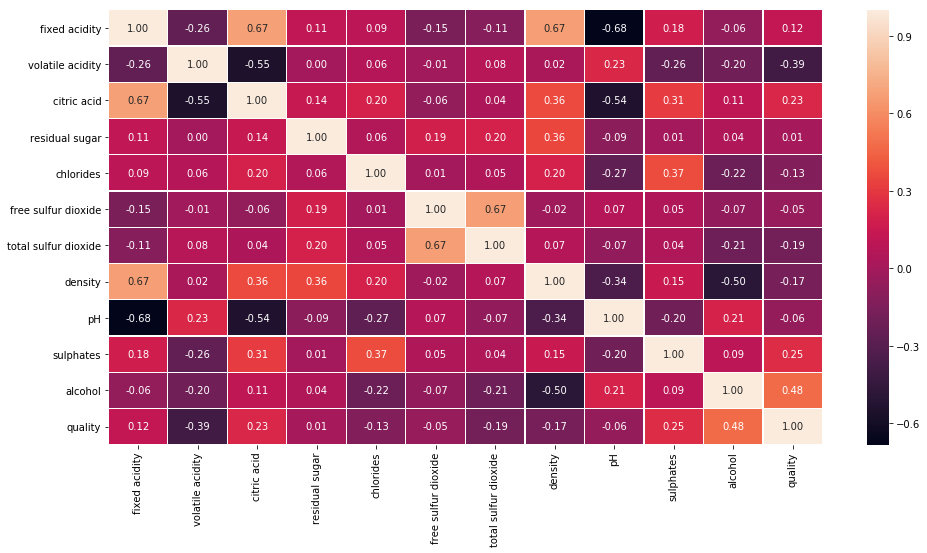

In [81]:
ax = plt.figure(figsize=(16,8))
ax = sns.heatmap(winedf.corr(),annot=True,fmt='1.2f',linewidths=0.1)
ax

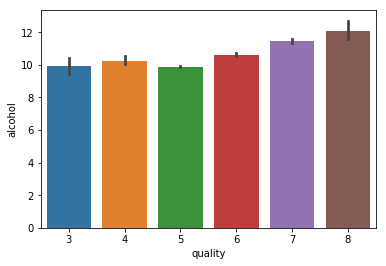

In [82]:
sns.barplot(x=winedf['quality'],y=winedf['alcohol'],data=winedf)

In [83]:
winedf['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [84]:
bins = (2,6,8)
labels = ['bad','good']
group = pd.cut(x= winedf['quality'], bins = bins, labels = labels)
winedf['quality'] = group

In [85]:
winedf['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [86]:
len(winedf['quality'])

1599

In [87]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [88]:
X = winedf.iloc[:,0:11]
y = winedf.iloc[:,11]

In [89]:
label = LabelEncoder()
y = label.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.fit_transform(X_test)

In [101]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

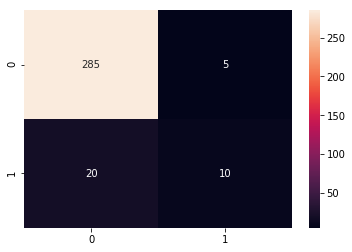

In [109]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='1.0f')

In [117]:
#K fold cross validation
accuracy = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracy.mean()*100

87.57165869346274

In [120]:
# Hyper parameter finding
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [132]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs=1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [123]:
best_accuracy

0.893666927286943

In [124]:
best_parameters

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [128]:
classifier = SVC(C=1,kernel='rbf',gamma=0.9,random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

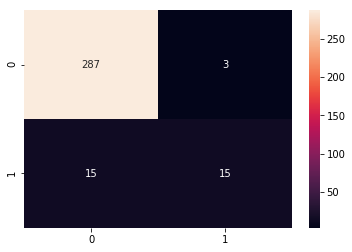

In [129]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='1.0f')

In [131]:
accuracy_score(y_test,y_pred)

0.94375